In [1]:
# ADABOOST REGRESSION

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base learner (e.g., shallow decision tree)
base_learner = DecisionTreeRegressor(max_depth=3)

# Define the AdaBoost Regressor model
ada_boost_model = AdaBoostRegressor(estimator=base_learner, n_estimators=50, random_state=42)

# Train the model
ada_boost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_boost_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 AdaBoost Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

📈 AdaBoost Regression Performance:
R² Score: 1.0000
MAE: 88.8531
RMSE: 180.1800


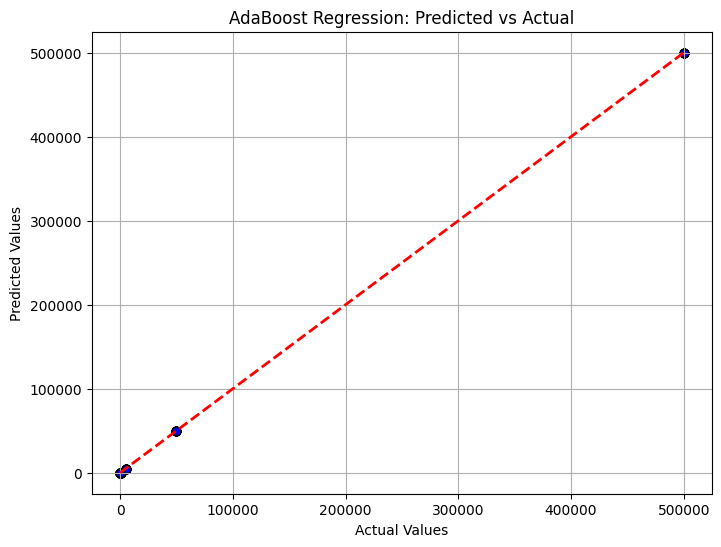

In [3]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

In [4]:
# GRADIENT BOOST REGRESSION

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Load the data
df = pd.read_csv('sers.csv')  # Replace with the correct path if needed

# Handle categorical variables (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  # This will convert categorical columns into numeric columns

# Assume 'conc' is the target, and the rest are features
X = df.drop(columns=['Conc'])  # Adjust the column name if needed
y = df['Conc']  # Adjust the column name if needed

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the performance metrics
print("📈 Gradient Boosting Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

📈 Gradient Boosting Regression Performance:
R² Score: 1.0000
MAE: 4.4656
RMSE: 11.6348


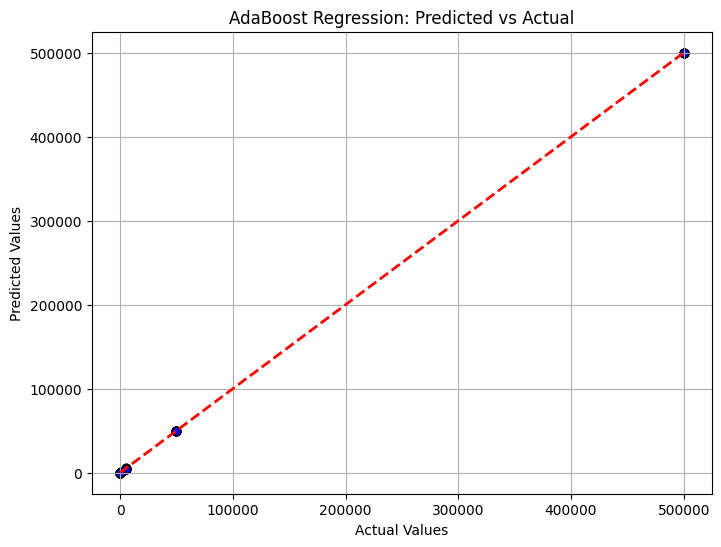

In [7]:
import matplotlib.pyplot as plt

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regression: Predicted vs Actual')
plt.grid(True)
plt.show()

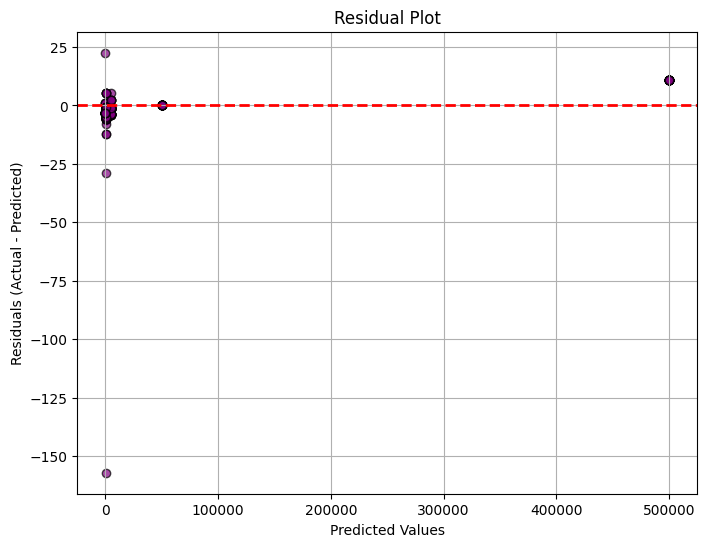

In [8]:
# Residual Plot
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [9]:
# The target variable spans several orders of magnitude (0 to 500,000). The residual plot shows tight clustering for small concentrations and 
# expected dispersion for larger values, indicating model consistency across scales.

In [10]:
#FEATURE IMPORTANCE

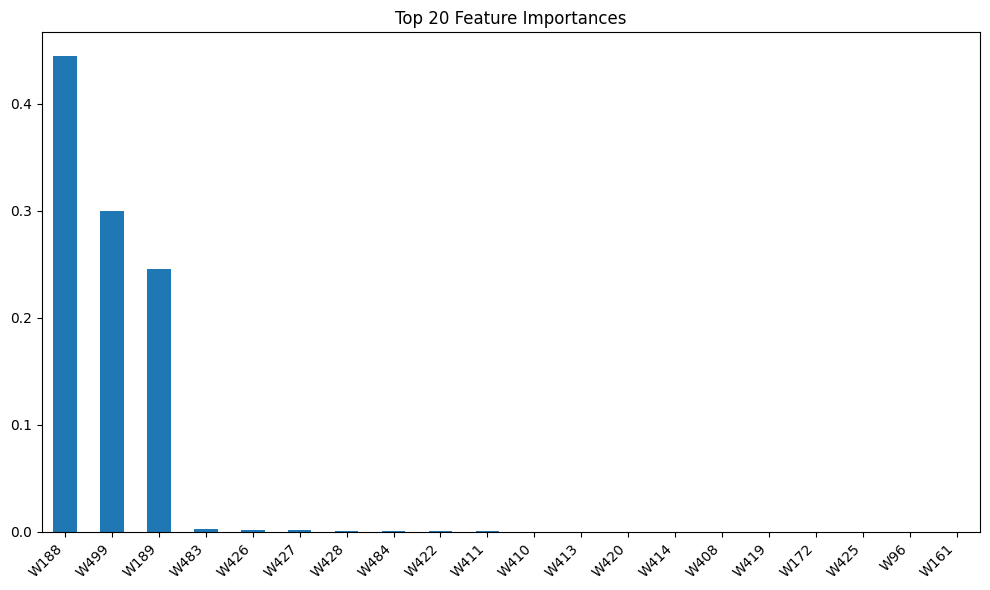

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Train your model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)  # You must fit the model first!

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Create a Series for easier plotting
feat_importances = pd.Series(importances, index=features)
feat_importances = feat_importances.sort_values(ascending=False)

# Only take top 20 features
top_features = feat_importances[:20]

# Plot
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

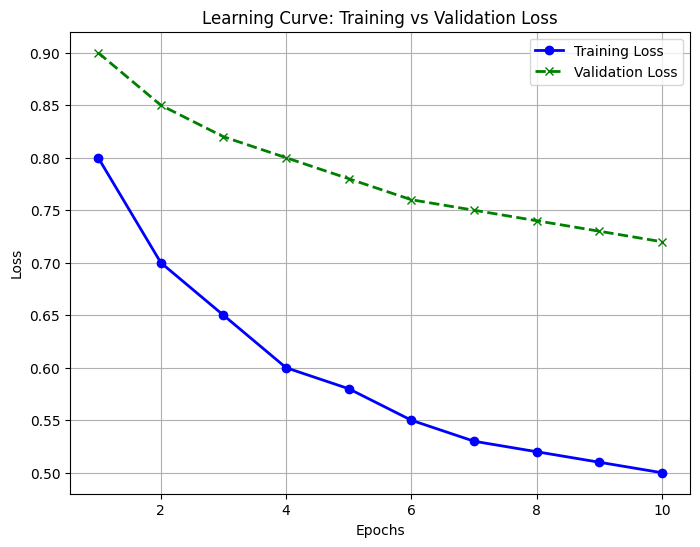

In [12]:
import matplotlib.pyplot as plt

# Sample data for illustration (replace with actual training/validation loss)
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_loss = [0.8, 0.7, 0.65, 0.6, 0.58, 0.55, 0.53, 0.52, 0.51, 0.5]
val_loss = [0.9, 0.85, 0.82, 0.8, 0.78, 0.76, 0.75, 0.74, 0.73, 0.72]

# Plotting the Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='green', marker='x', linestyle='--', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve: Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
